In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/avocado-prices/avocado.csv


In [2]:
import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
avocado_df = pd.read_csv('../input/avocado-prices/avocado.csv')

In [4]:
avocado_df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [5]:
avocado_df.shape

(18249, 14)

In [6]:
avocado_df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [7]:
avocado_df = avocado_df.rename(columns = {'Unnamed: 0': 'id'})

In [8]:
avocado_df.isnull().sum()

id              0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
avocado_df = avocado_df.infer_objects()

In [10]:
avocado_df[['AveragePrice']] = avocado_df[['AveragePrice']].astype(float)

In [11]:
avocado_df.dtypes

id                int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [12]:
avocado_df.head()

,id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
avocado_df.Date.min()

'2015-01-04'

In [14]:
avocado_df.Date.max()

'2018-03-25'

In [15]:
avocado_df.groupby('Date') \
    .id.nunique().head(20)

Date
2015-01-04    2
2015-01-11    2
2015-01-18    2
2015-01-25    2
2015-02-01    2
2015-02-08    2
2015-02-15    2
2015-02-22    2
2015-03-01    2
2015-03-08    2
2015-03-15    2
2015-03-22    2
2015-03-29    2
2015-04-05    2
2015-04-12    2
2015-04-19    2
2015-04-26    2
2015-05-03    2
2015-05-10    2
2015-05-17    2
Name: id, dtype: int64

<AxesSubplot:xlabel='Date'>

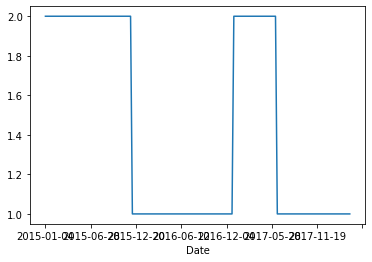

In [16]:
avocado_df.groupby('Date') \
    .id.nunique().plot()

In [17]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

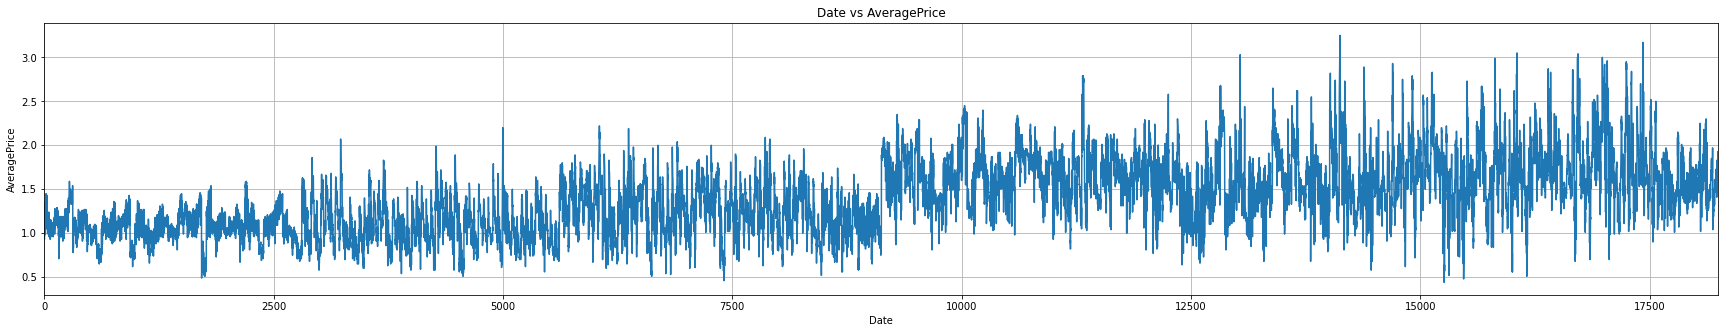

In [18]:
plt.title('Date vs AveragePrice')
plt.ylabel('AveragePrice')
plt.xlabel('Date')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(avocado_df['AveragePrice'])

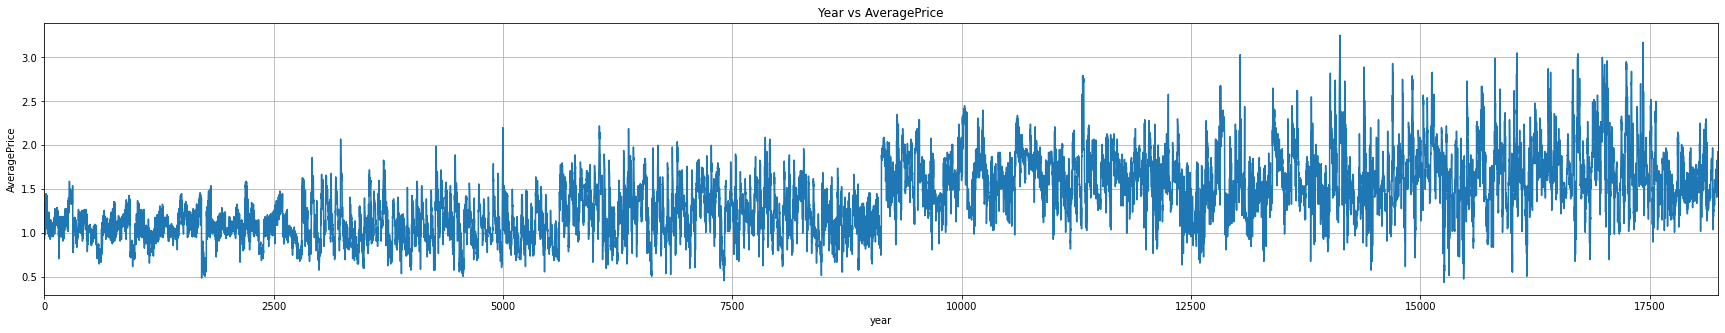

In [19]:
plt.title('Year vs AveragePrice')
plt.ylabel('AveragePrice')
plt.xlabel('year')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(avocado_df['AveragePrice'])

In [20]:
avocado_train = avocado_df.loc[(avocado_df['year'] == 2015) | (avocado_df['year'] == 2016) | (avocado_df['year'] == 2017)]

In [21]:
avocado_train1 = avocado_df.loc[(avocado_df['year'] == 2015) | (avocado_df['year'] == 2016) | (avocado_df['year'] == 2017)]

In [22]:
avocado_train1 = avocado_train1.AveragePrice

In [23]:
avocado_train1

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
17596    1.30
17597    1.21
17598    1.19
17599    1.18
17600    1.28
Name: AveragePrice, Length: 16953, dtype: float64

In [24]:
avocado_train = avocado_train.AveragePrice

In [25]:
avocado_train_pred = avocado_train

In [26]:
avocado_train_pred

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
17596    1.30
17597    1.21
17598    1.19
17599    1.18
17600    1.28
Name: AveragePrice, Length: 16953, dtype: float64

In [27]:
avocado_train = avocado_train.iloc[:].values

In [28]:
avocado_train = avocado_train.reshape(-1, 1)

In [29]:
avocado_train

array([[1.33],
       [1.35],
       [0.93],
       ...,
       [1.19],
       [1.18],
       [1.28]])

In [30]:
avocado_train.shape

(16953, 1)

In [31]:
avocado_test = avocado_df.loc[(avocado_df['year'] == 2018)]

In [32]:
avocado_test1 = avocado_df.loc[(avocado_df['year'] == 2018)]

In [33]:
avocado_test1 = avocado_test1.AveragePrice

In [34]:
avocado_test1

8478     1.57
8479     1.35
8480     1.12
8481     1.08
8482     1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 1296, dtype: float64

In [35]:
avocado_test1.shape

(1296,)

In [36]:
avocado_test = avocado_test.AveragePrice

In [37]:
avocado_test = avocado_test.iloc[:].values

In [38]:
avocado_test = avocado_test.reshape(-1, 1)

In [39]:
avocado_test

array([[1.57],
       [1.35],
       [1.12],
       ...,
       [1.87],
       [1.93],
       [1.62]])

In [40]:
avocado_test.shape

(1296, 1)

In [41]:
avocado_test

array([[1.57],
       [1.35],
       [1.12],
       ...,
       [1.87],
       [1.93],
       [1.62]])

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [44]:
avocado_train_scaled = scaler.fit_transform(avocado_train)

In [45]:
features_set = []
labels = []
for i in range(60, 16953):
    features_set.append(avocado_train_scaled[i-60:i, 0])
    labels.append(avocado_train_scaled[i, 0])

In [46]:
features_set, labels = np.array(features_set), np.array(labels)

In [47]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))


In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [49]:
model = Sequential()


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

In [50]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [51]:
model.add(Dropout(0.2))

In [52]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [53]:
model.add(Dense(units = 1))

In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [55]:
model.fit(features_set, labels, epochs = 5, batch_size = 32)


2022-10-04 14:39:56.973877: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
528/528 [==============================] - 122s 214ms/step - loss: 0.0099
Epoch 2/5
528/528 [==============================] - 102s 192ms/step - loss: 0.0059
Epoch 3/5
528/528 [==============================] - 96s 181ms/step - loss: 0.0048
Epoch 4/5
528/528 [==============================] - 97s 184ms/step - loss: 0.0044
Epoch 5/5
528/528 [==============================] - 97s 184ms/step - loss: 0.0042


In [56]:
avocado_total = pd.concat((avocado_train1, avocado_test1), axis=0)

In [57]:
test_inputs = avocado_total[len(avocado_total) - len(avocado_test1) - 60:].values

In [58]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [59]:
test_features = []
for i in range(60, 1296):
    test_features.append(test_inputs[i-60:i, 0])

In [60]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))


In [61]:
predictions = model.predict(test_features)

In [62]:
predictions = scaler.inverse_transform(predictions)

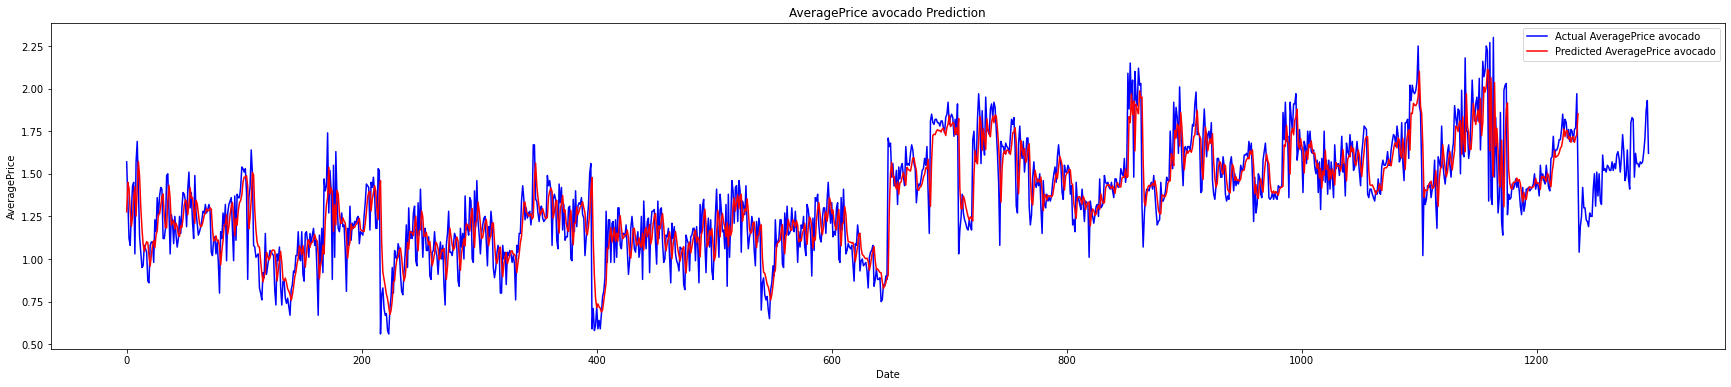

In [63]:
plt.figure(figsize=(30,6))
plt.plot(avocado_test, color='blue', label='Actual AveragePrice avocado')
plt.plot(predictions , color='red', label='Predicted AveragePrice avocado')
plt.title('AveragePrice avocado Prediction')
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.legend()
plt.show()